## Students:
1.   João Valério
2.   Eirik Grytøyr

In [1]:
import nltk
import time
import timeit
import dill
from matplotlib import pyplot as plt
nltk.download('treebank')
!pip install python-crfsuite

[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Train and test data

In [2]:
# Getting the train and test data
def train_data (train):
  return nltk.corpus.treebank.tagged_sents()[:train]
test_data = nltk.corpus.treebank.tagged_sents()[3000:]

# **Training models**

# Save training data (model + time)

In [3]:
def file_saver(name, model, ft, dt):
  if (name != "CRF"):
    # Saving the accuracy in binary mode
    with open(name + "_trained_model_" + str(dt), "wb") as f:
      dill.dump(model, f)
  # Saving the training time in one file
  with open(name + "_training_time" , "a") as f:
    f.write(str(ft) + '\n')

# HMM

In [4]:
def train_HMM():
  
  for dt in (500, 1000, 1500, 2000, 2500, 3000):
    # Start timer
    st = time.time()
    # Setting the Hidden Markov Model (HMM) model
    trainer = nltk.tag.hmm.HiddenMarkovModelTrainer()
    # Training the Hidden Markov Model (HMM) model
    HMM = trainer.train_supervised(train_data(dt))
    # Get training time
    ft = round(time.time() - st, 3)
    # Saving the accuracy in binary mode and the training time (one file)
    file_saver('HMM', HMM, ft, dt)

# TnT

In [5]:
def train_TnT():

  for dt in (500, 1000, 1500, 2000, 2500, 3000):
    # Start timer
    st = time.time()
    # Setting the Trigrams'n'Tags (TnT) model
    TnT = nltk.tag.tnt.TnT()
    # Training the Trigrams'n'Tags (TnT) model
    TnT.train(train_data(dt))
    # Get training time
    ft = round(time.time() - st, 3)
    # Saving the accuracy in binary mode and the training time (one file)
    file_saver('TnT', TnT, ft, dt)

# Perceptron

In [6]:
def train_PER():

  for dt in (500, 1000, 1500, 2000, 2500, 3000):
    # Start timer
    st = time.time()
    # Setting the Perceptron model
    PER = nltk.tag.perceptron.PerceptronTagger(load=False)
    # Training the Perceptron model
    PER.train(train_data(dt))
    # Get training time
    ft = round(time.time() - st, 3)
    # Saving the accuracy in binary mode and the training time (one file)
    file_saver('PER', PER, ft, dt)

# CRF

In [7]:
def train_CRF():

  for dt in (500, 1000, 1500, 2000, 2500, 3000):
    # Start timer
    st = time.time()
    # Setting the CRF model
    # CRF is a global variable due to the need of using the set_model_file function
    # in other function
    global CRF
    CRF = nltk.tag.CRFTagger()
    # Training and saving the CRF model
    CRF.train(train_data(dt), "CRF_trained_model_" + str(dt))
    # Get training time
    ft = round(time.time() - st, 3)
    # Saving the training time (one file)
    file_saver('CRF', CRF, ft, dt)

# Train all the models

In [12]:
def train_all_models():
  train_HMM()
  train_TnT()
  train_PER()
  train_CRF()

# To retrain the model
#train_all_models()

# **Testing models**

# Tester

In [9]:
# Accuracy List
accuracy_lst = []
# Testing time List
testing_time_lst = []
# Training time List
training_time_lst = []

def tester():

  for name in ("HMM", "TnT", "PER", "CRF"):
    # Accuracy List
    model_accuracy_lst = []
    # Testing time List
    model_testing_time_lst = []

    for dt in (500, 1000, 1500, 2000, 2500, 3000):
      # Loading the model
      if (name != "CRF"):
        with open(name + "_trained_model_" + str(dt), "rb") as f:
          model = dill.load(f)
      else:
        CRF.set_model_file(name + "_trained_model_" + str(dt))
        model = CRF
        
      # Start timer
      st = time.time()
      # Testing the model
      model_accuracy_lst.append(round(model.evaluate(test_data), 3))
      # Get testing time
      model_testing_time_lst.append(round(time.time() - st, 3))
      
      # If we want to achieve the times with more precision, we can use the
      # following function 
      #model_testing_time_lst.append(round(timeit.timeit(lambda: model.evaluate(test_data), number = 5) / 5, 3))
    
    # Saving the accuracy values
    accuracy_lst.append(model_accuracy_lst)
    # Saving the testing time values
    testing_time_lst.append(model_testing_time_lst)
    # Loading and saving the training time
    with open(name + "_training_time", "r") as f:
      training_time_lst.append([float(training_time.strip('\n')) for training_time in f.readlines()[0:6]])
  
  return accuracy_lst, training_time_lst, testing_time_lst

# Plot graphs

In [10]:
def plot (accuracy_lst, training_time_lst, testing_time_lst):

  # Creating a subplot
  f, axarr = plt.subplots(3,5, figsize = (30,30))
  for id, ypoints_accuracy, ypoints_training_time, ypoints_testing_time, name, cl in zip(range(0,4), accuracy_lst, training_time_lst,
      testing_time_lst, ("HMM", "TnT", "PER", "CRF"), ("blue", "red", "green", "black")):
                                                          
    # Accuracy all subplots
    axarr[0][4].plot([500, 1000, 1500, 2000, 2500, 3000], ypoints_accuracy, color=cl, label = name)

    # Accuracy individual subplots
    axarr[0][id].set_title(name + " - Accuracy")
    axarr[0][id].set_xlabel("Training Data")
    axarr[0][id].set_ylabel("Accuracy")
    axarr[0][id].plot([500, 1000, 1500, 2000, 2500, 3000], ypoints_accuracy, color=cl)

    # Training time all subplots
    axarr[1][4].plot([500, 1000, 1500, 2000, 2500, 3000], ypoints_training_time, color=cl, label = name)

    # Training time individual subplots
    axarr[1][id].set_title(name + " - Training Time")
    axarr[1][id].set_xlabel("Training Data")
    axarr[1][id].set_ylabel("Time [sec]")
    axarr[1][id].plot([500, 1000, 1500, 2000, 2500, 3000], ypoints_training_time, color=cl)

    # Testing time all subplots
    axarr[2][4].plot([500, 1000, 1500, 2000, 2500, 3000], ypoints_testing_time, color=cl, label = name)

    # Testing time individual subplots
    axarr[2][id].set_title(name + " - Testing Time")
    axarr[2][id].set_xlabel("Training Data")
    axarr[2][id].set_ylabel("Time [sec]")
    axarr[2][id].plot([500, 1000, 1500, 2000, 2500, 3000], ypoints_testing_time, color=cl)
  
  # Accuracy all subplots
  axarr[0][4].set_title("Accuracy - All Methods")
  axarr[0][4].set_xlabel("Training Data")
  axarr[0][4].set_ylabel("Accuracy")
  axarr[0][4].legend(loc='best')
  
  # Training time all subplots
  axarr[1][4].set_title("Training Time - All Methods")
  axarr[1][4].set_xlabel("Training Data")
  axarr[1][4].set_ylabel("Time [sec]")
  axarr[1][4].legend(loc='best')

  # Testing time all subplots
  axarr[2][4].set_title("Testing Time - All Methods")
  axarr[2][4].set_xlabel("Training Data")
  axarr[2][4].set_ylabel("Time [sec]")
  axarr[2][4].legend(loc='best')

  plt.show()

# General tester

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: DeprecationWarning: 
  Function evaluate() has been deprecated.  Use accuracy(gold)
  instead.


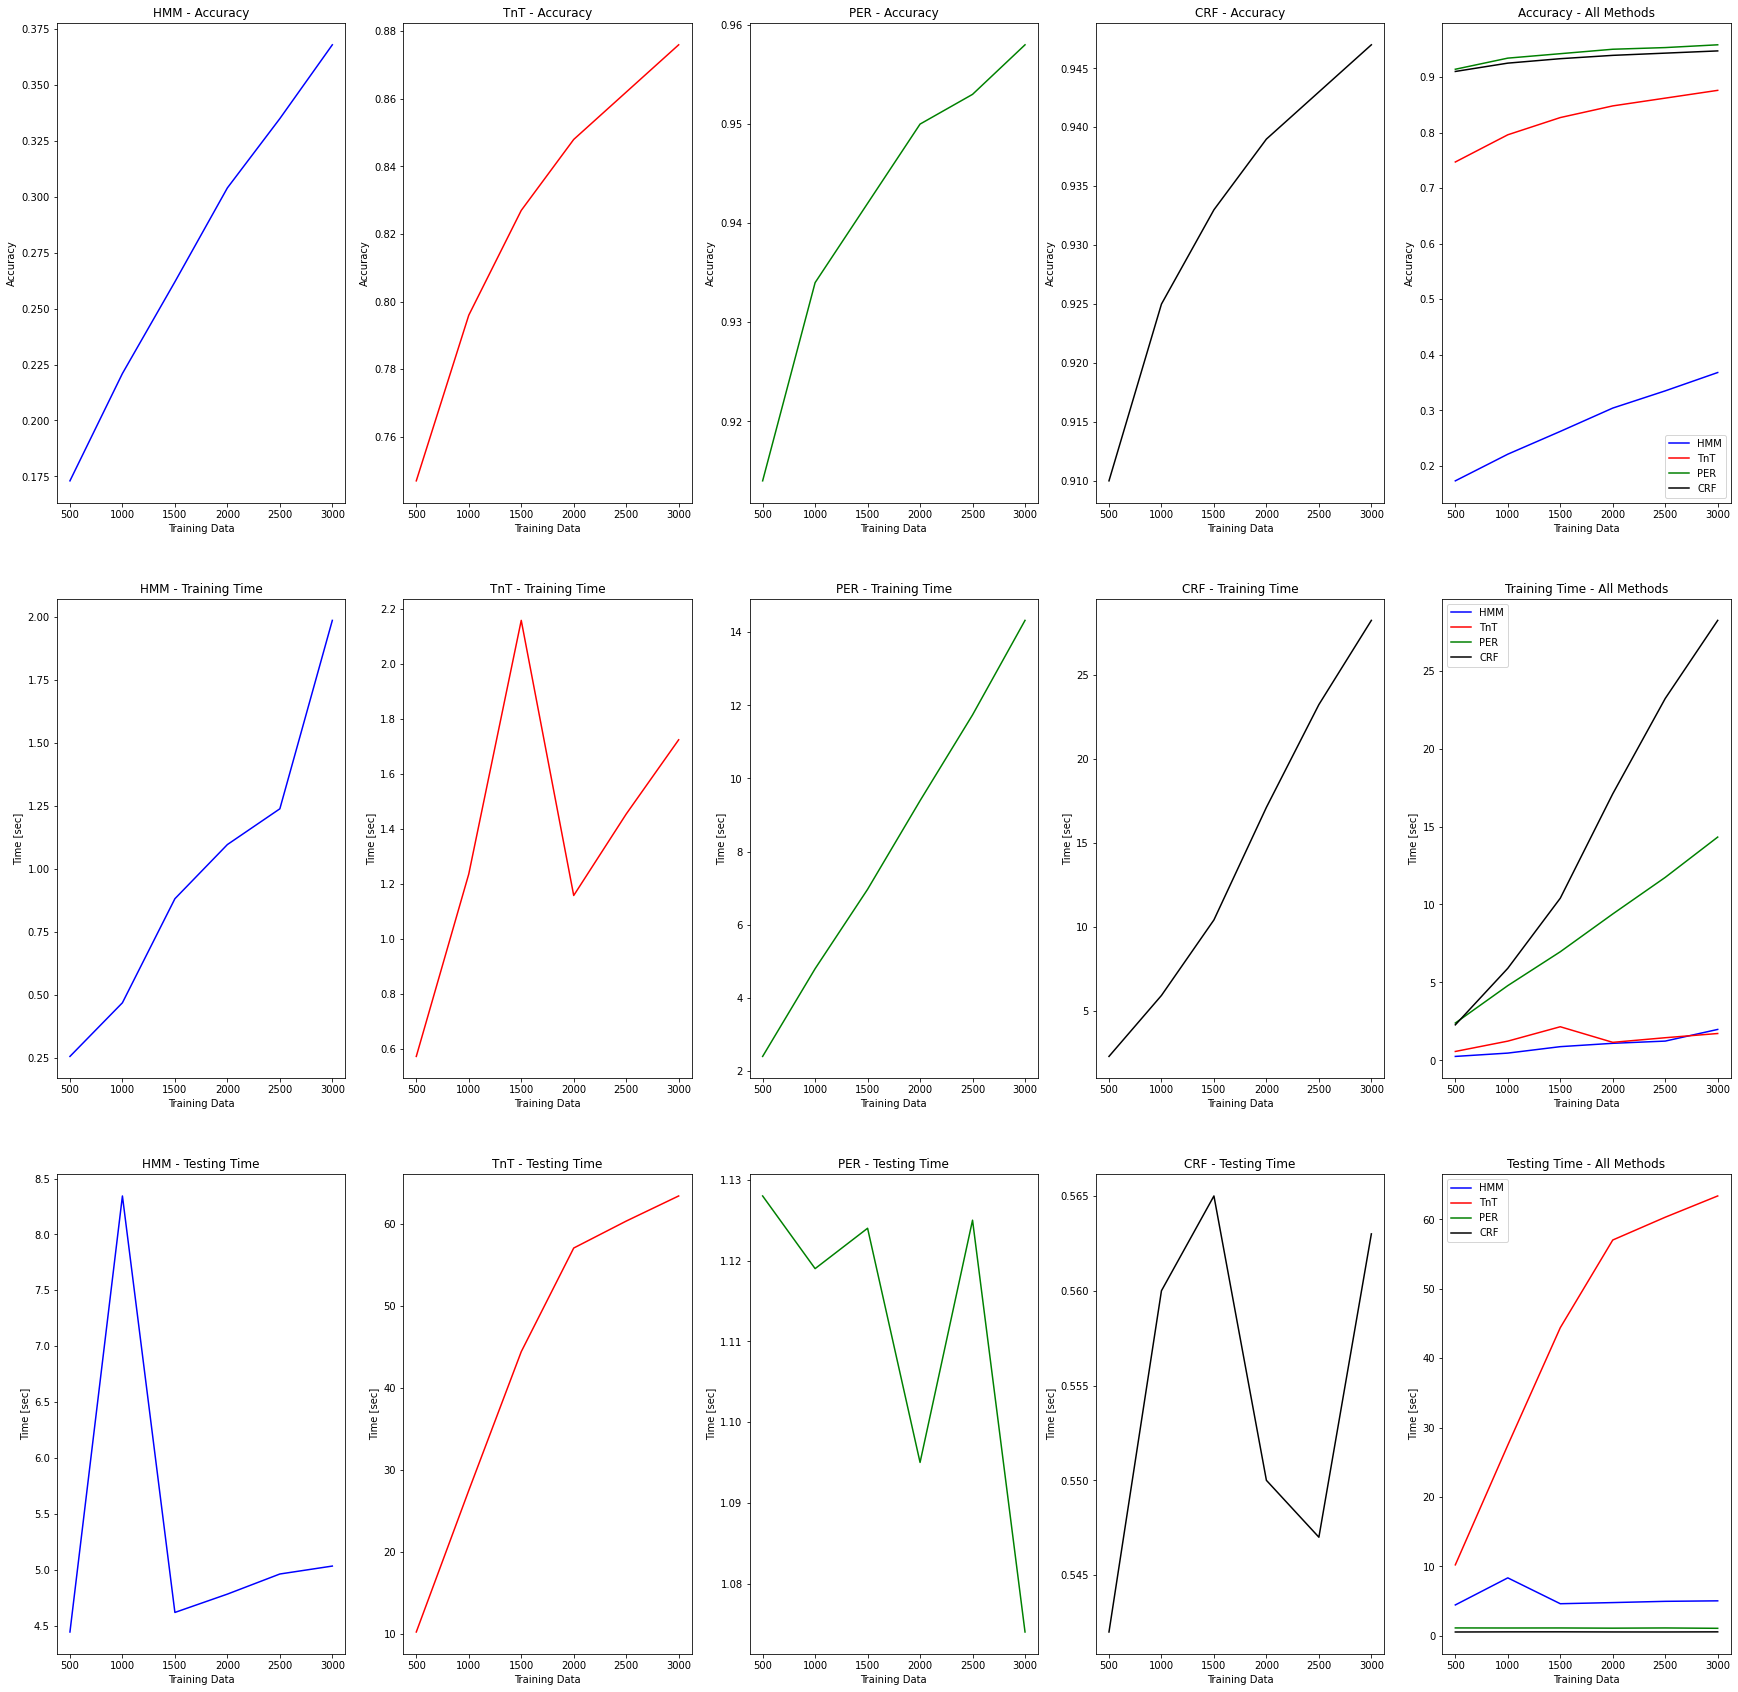

In [11]:
def general_tester ():
  accuracy_lst, training_time_lst, testing_time_lst = tester()
  plot (accuracy_lst, training_time_lst, testing_time_lst)

general_tester ()

The code developed obtained 3 different performance metrics (accuracy, training time and testing time) related to the 4 models in analysis (HMM, TnT, PER and CRF). It should be noticed that the timing of the code is not exact, but a guideline, as different CPU loads can affect the result.

**Accuracy:**

In the first metric, it's inferable by the graphs that, overall, the sequence of accuracy in the models is the following:

(Worst Model) HMM << TnT < CRF < PER (Best Model)

For every algorithm, as foreseen, the accuracy improves nonlinearly with the size of the training data, but with distinct slopes depending on the model. While HMM and TnT showed, respectively, an increase of 20% and 12% in performance, within the range of the samples, the others don't go over a 6% of increment. However, the initial accuracy of the latter (CRF and PER) is significantly better than HMM and TnT, with poor and reasonable results respectively; thus, it is more challenging to improve the model, since they are closer to converging to the theoretical limit of accuracy.

Therefore, in terms of accuracy, PER and CRF are the most useful models, achieving substantial good results (> 0.90) with any size of the training data.

**Training time:**

Relatively to the training time, the panorama is described by:

(Best Model) HMM ≈ TnT << PER << CRF (Worst Model)

Accordingly, to the graphical representations and the sequence defined overhead, it's reasoned that, in general, the training time grows as an effect of the increment of the sample size. Even though HMM and TnT fixed the most promising registrations, only in TnT the relational accuracy-training time is valuable. On the other side of the spectrum, PER and CRF register the higher values, justifiable by the accuracies reached. Particularly, the relation in terms of the training time starts as CRF ≈ PER and ceases about CRF ≈ 2.0*PER. Therefore, despite having extremely close accuracies, the slope of CRF is substantially bigger, resulting in an extreme difference when the training size is equal to 3000.

In consonance with the prior breakdowns, TnT and PER indicate the most interesting and desirable relation between accuracy and training time.

**Testing time:**

The ordering of the last performance metric is:

(Best Model) CRF ≈ PER < HMM << TnT (Worst Model)

In this metric, PER, CRF and HMM have, on a broader scale, a roughly constant relation between time and training size, in which the first two achieve the most desirable values ​​for a model. Oppositely, TnT illustrates a relation of growth, with high-time values, not desirable for a model, explaining the low training time with considerable good accuracy.

**Conclusion:**

To conclude, the best algorithm for tagging depends on which metric is more significant for the project. In terms of accuracy and testing time, PER and CRF are the most satisfactory choices, while in training time TnT is the most interesting option. However, considering the 3 components together, PER algorithm is the best model for tagging, because it is the one with a more adequate balance between the 3 metrics of performance (very good accuracy and testing time, and a reasonable training time).